In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
#import formatting tools
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Data_For_Collab/Crime_Data_Logistic_Reg_Data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df

,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BANK,AUTOMATED TELLER MACHINE (ATM),CYBERSPACE,OTHER BUSINESS,OTHER PREMISE
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
235061,0,0,0,0,0,0,0,0
235062,0,0,0,0,0,0,0,0
235063,0,0,0,0,0,0,0,0
235064,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['THEFT OF IDENTITY', 'SINGLE FAMILY DWELLING',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'BANK',
       'AUTOMATED TELLER MACHINE (ATM)', 'CYBERSPACE', 'OTHER BUSINESS',
       'OTHER PREMISE'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preprocess data
X = df.drop(['THEFT OF IDENTITY','OTHER BUSINESS','OTHER PREMISE','SINGLE FAMILY DWELLING','MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'],  axis=1)
y = df['THEFT OF IDENTITY']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9204279576296422
Confusion Matrix:
 [[42558    90]
 [ 3651   715]]


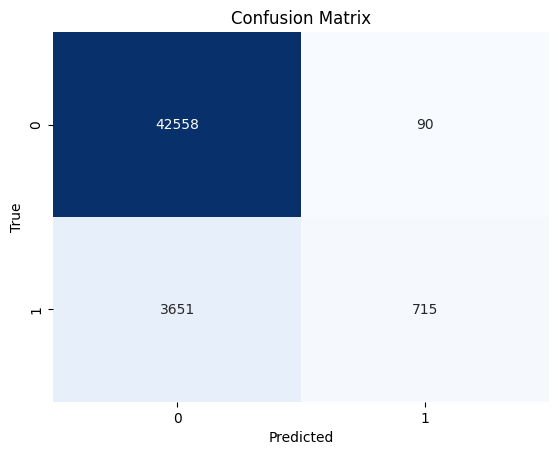

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.8881987577639752
Recall: 0.16376546037562986
F1-Score: 0.2765422548830014


In [ ]:
import statsmodels.api as sm

model = sm.Logit(y, sm.add_constant(X))
results = model.fit()

# Get the summary as a DataFrame
summary_df = pd.DataFrame(results.summary2().tables[1])


# Print the DataFrame
summary_df


Optimization terminated successfully.
         Current function value: 0.279487
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-2.440510,0.007665,-318.375881,0.0,-2.455534,-2.425486
BANK,4.052771,0.065552,61.825383,0.0,3.924291,4.181250
AUTOMATED TELLER MACHINE (ATM),5.417045,0.121906,44.436143,0.0,5.178113,5.655977
CYBERSPACE,5.332937,0.140014,38.088549,0.0,5.058514,5.607360


Accuracy: 0.9204279576296422
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42648
           1       0.89      0.16      0.28      4366

    accuracy                           0.92     47014
   macro avg       0.90      0.58      0.62     47014
weighted avg       0.92      0.92      0.89     47014



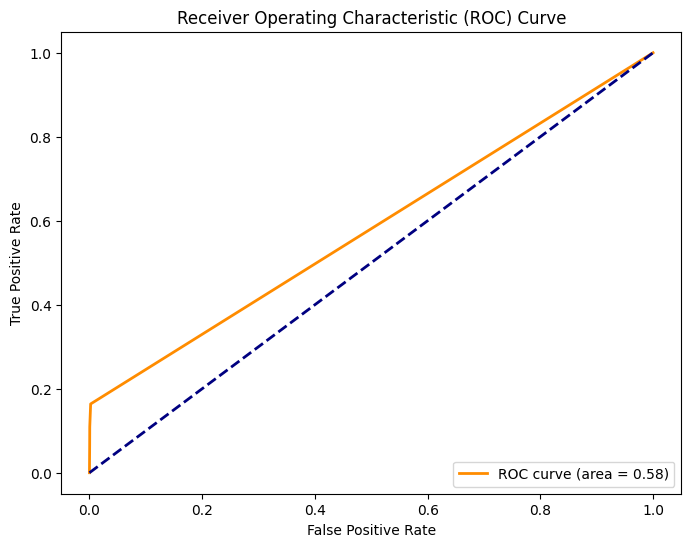

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()